In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
mush=pd.read_csv('../input/mushroom-classification/mushrooms.csv')
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# DATA PREPROCESSING

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mush.columns:
    mush[col]=labelencoder.fit_transform(mush[col])
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [6]:
x=mush.drop('class',axis=1)
y=mush['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=404)

In [10]:
from imblearn.over_sampling import SMOTE
x_train,y_train = SMOTE().fit_resample(x_train,y_train)

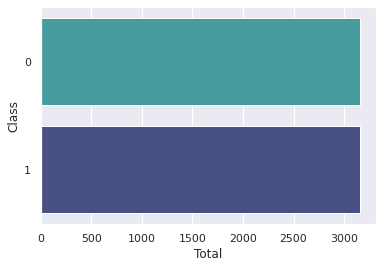

In [11]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train,data=mush,palette="mako_r")
plt.ylabel('Class')
plt.xlabel('Total')
plt.show()

# LOGISTIC REGRESSION

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred_lr_train=lr.predict(x_train)
y_pred_lr_test=lr.predict(x_test)

In [15]:
lr.coef_

array([[-0.0304784 ,  0.46084201, -0.20545234,  0.0961577 , -1.75483181,
        -0.78073117, -4.9106724 ,  5.94351095, -0.58054147, -0.27485227,
        -4.69942208, -4.7396082 ,  0.0844374 , -0.37223896, -0.14978495,
         0.        ,  6.18261802,  0.54967385,  4.32395915, -0.5568532 ,
        -0.98146481,  0.13384737]])

In [16]:
lr.intercept_

array([-1.76956805])

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
print('Classification Report : ',classification_report(y_train,y_pred_lr_train))
print('***********')
print('Classification Report : ',classification_report(y_test,y_pred_lr_test))

Classification Report :                precision    recall  f1-score   support

           0       0.96      0.96      0.96      3153
           1       0.96      0.96      0.96      3153

    accuracy                           0.96      6306
   macro avg       0.96      0.96      0.96      6306
weighted avg       0.96      0.96      0.96      6306

***********
Classification Report :                precision    recall  f1-score   support

           0       0.95      0.96      0.96      1055
           1       0.96      0.95      0.95       976

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [19]:
print('Confusion Matrix : ',confusion_matrix(y_test,y_pred_lr_test))

Confusion Matrix :  [[1015   40]
 [  49  927]]


In [20]:
print(accuracy_score(y_train,y_pred_lr_train))
print(accuracy_score(y_test,y_pred_lr_test))

0.9575007928956549
0.9561792220580995


In [21]:
from sklearn.metrics import roc_auc_score
logit_roc_auc=roc_auc_score(y_test,y_pred_lr_test)
logit_roc_auc

0.9559401950120426

In [22]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_lr_test)

In [23]:
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.03791469, 1.        ])

array([0.        , 0.94979508, 1.        ])

array([2, 1, 0])

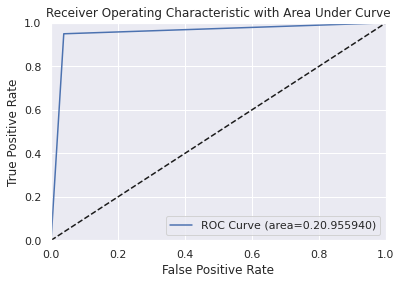

In [24]:
plt.figure()
plt.plot(fpr,tpr, label="ROC Curve (area=0.2%f)"% logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
accuracy_train=cross_val_score(lr,X=x_train,y=y_train,cv = 15)
accuracy_test=cross_val_score(lr,X=x_test,y=y_test,cv = 15)
print(accuracy_train)
print('\n')
print(accuracy_test)

[0.95724466 0.97862233 0.95011876 0.94061758 0.95961995 0.96199525
 0.9547619  0.95952381 0.95952381 0.93571429 0.95952381 0.94761905
 0.9547619  0.95714286 0.97142857]


[0.97058824 0.88970588 0.95588235 0.94117647 0.94852941 0.90441176
 0.94074074 0.94074074 0.99259259 0.95555556 0.92592593 0.97777778
 0.95555556 0.95555556 0.95555556]


# DECISION TREE REGRESSOR

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_gini.fit(x_train,y_train)
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
y_pred_dt_gini_train=dt_gini.predict(x_train)
y_pred_dt_gini_test=dt_gini.predict(x_test)

In [29]:
y_pred_dt_entropy_train=dt_entropy.predict(x_train)
y_pred_dt_entropy_test=dt_entropy.predict(x_test)

In [41]:
print(confusion_matrix(y_test,y_pred_dt_gini_test))
print('\n')
print(confusion_matrix(y_test,y_pred_dt_entropy_test))

[[1055    0]
 [   0  976]]


[[1055    0]
 [   0  976]]


In [42]:
print(classification_report(y_test,y_pred_dt_gini_test))
print('\n')
print(classification_report(y_test,y_pred_dt_entropy_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1055
           1       1.00      1.00      1.00       976

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1055
           1       1.00      1.00      1.00       976

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [30]:
print(accuracy_score(y_train,y_pred_dt_gini_train))
print('\n')
print(accuracy_score(y_test,y_pred_dt_gini_test))

1.0


1.0


In [31]:
print(accuracy_score(y_train,y_pred_dt_entropy_train))
print('\n')
print(accuracy_score(y_test,y_pred_dt_entropy_test))

1.0


1.0


In [32]:
accuracy_train_dt_gini=cross_val_score(dt_gini,X=x_train,y=y_train,cv=15)
accuracy_test_dt_gini=cross_val_score(dt_gini,X=x_test,y=y_test,cv=15)
print(accuracy_train_dt_gini)
print('\n')
print(accuracy_test_dt_gini)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


[1.         0.99264706 1.         1.         1.         1.
 1.         0.99259259 1.         1.         1.         1.
 1.         1.         1.        ]


In [33]:
accuracy_train_dt_entropy=cross_val_score(dt_entropy,X=x_train,y=y_train,cv=15)
accuracy_test_dt_entropy=cross_val_score(dt_entropy,X=x_test,y=y_test,cv=15)
print(accuracy_train_dt_entropy)
print('\n')
print(accuracy_test_dt_entropy)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


[1.         0.99264706 1.         1.         0.99264706 1.
 1.         0.99259259 1.         1.         1.         1.
 1.         1.         1.        ]


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred_rf_train=rf.predict(x_train)
y_pred_rf_test=rf.predict(x_test)

In [37]:
print(confusion_matrix(y_train,y_pred_rf_train))
print('\n')
print(confusion_matrix(y_test,y_pred_rf_test))

[[3153    0]
 [   0 3153]]


[[1055    0]
 [   0  976]]


In [38]:
print(classification_report(y_train,y_pred_rf_train))
print('\n')
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00      3153

    accuracy                           1.00      6306
   macro avg       1.00      1.00      1.00      6306
weighted avg       1.00      1.00      1.00      6306



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1055
           1       1.00      1.00      1.00       976

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [39]:
print(accuracy_score(y_train,y_pred_rf_train))
print('\n')
print(accuracy_score(y_test,y_pred_rf_test))

1.0


1.0


# KNN CLASSIFIER

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
y_pred_knn_train=knn.predict(x_train)
y_pred_knn_test=knn.predict(x_test)

In [46]:
print(confusion_matrix(y_train,y_pred_knn_train))
print('\n')
print(confusion_matrix(y_test,y_pred_knn_test))

[[3153    0]
 [   0 3153]]


[[1055    0]
 [   0  976]]


In [47]:
print(classification_report(y_train,y_pred_knn_train))
print('\n')
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3153
           1       1.00      1.00      1.00      3153

    accuracy                           1.00      6306
   macro avg       1.00      1.00      1.00      6306
weighted avg       1.00      1.00      1.00      6306



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1055
           1       1.00      1.00      1.00       976

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [48]:
print(accuracy_score(y_train,y_pred_knn_train))
print('\n')
print(accuracy_score(y_test,y_pred_knn_test))

1.0


1.0


In [49]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [50]:
error_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0014771048744460858,
 0.0019694731659281144,
 0.0019694731659281144,
 0.0019694731659281144,
 0.0019694731659281144,
 0.0029542097488921715,
 0.0029542097488921715,
 0.0029542097488921715,
 0.0029542097488921715,
 0.003938946331856229,
 0.003938946331856229,
 0.004431314623338257,
 0.004431314623338257,
 0.004431314623338257,
 0.004431314623338257,
 0.004431314623338257,
 0.004431314623338257,
 0.004923682914820286,
 0.004923682914820286,
 0.004923682914820286,
 0.004923682914820286]

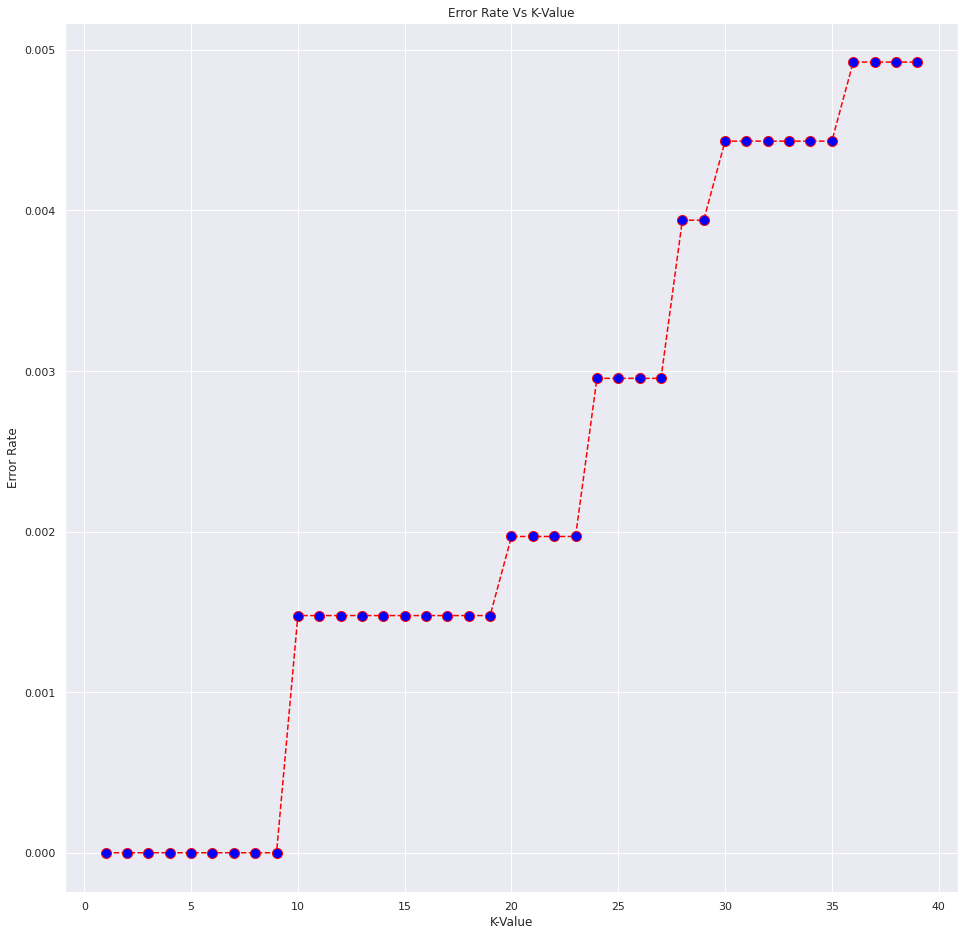

In [51]:
plt.figure(figsize = (16,16))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',
        markersize=10)
plt.title('Error Rate Vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')
plt.show()

In [52]:
knn=KNeighborsClassifier(n_neighbors=11) 
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [53]:
y_pred_knn_test=knn.predict(x_test)

In [54]:
print(accuracy_score(y_test,y_pred_knn_test))

0.9985228951255539


# SVM CLASSIFIER

In [55]:
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear')
svc_linear.fit(x_train,y_train)
svc_sigmoid=SVC(kernel='sigmoid')
svc_sigmoid.fit(x_train,y_train)
svc_poly=SVC(kernel='poly')
svc_poly.fit(x_train,y_train)
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)

SVC()

In [56]:
y_pred_sigmoid=svc_sigmoid.predict(x_test)
y_pred_linear=svc_linear.predict(x_test)
y_pred_poly=svc_poly.predict(x_test)
y_pred_rbf=svc_rbf.predict(x_test)

In [57]:
print(confusion_matrix(y_test,y_pred_sigmoid))
print('\n')
print(confusion_matrix(y_test,y_pred_linear))
print('\n')
print(confusion_matrix(y_test,y_pred_poly))
print('\n')
print(confusion_matrix(y_test,y_pred_rbf))

[[839 216]
 [175 801]]


[[1038   17]
 [   3  973]]


[[1055    0]
 [   0  976]]


[[1055    0]
 [   0  976]]


In [58]:
print(classification_report(y_test,y_pred_sigmoid))
print('\n')
print(classification_report(y_test,y_pred_linear))
print('\n')
print(classification_report(y_test,y_pred_poly))
print('\n')
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1055
           1       0.79      0.82      0.80       976

    accuracy                           0.81      2031
   macro avg       0.81      0.81      0.81      2031
weighted avg       0.81      0.81      0.81      2031



              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1055
           1       0.98      1.00      0.99       976

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1055
           1       1.00      1.00      1.00       976

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



             

In [59]:
print(round(accuracy_score(y_test,y_pred_sigmoid),2))
print('\n')
print(round(accuracy_score(y_test,y_pred_linear),2))
print('\n')
print(accuracy_score(y_test,y_pred_poly))
print('\n')
print(accuracy_score(y_test,y_pred_rbf))

0.81


0.99


1.0


1.0


# NAIVE BAYES CLASSIFIER

In [60]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [61]:
y_pred_nb_train=nb.predict(x_train)
y_pred_nb_test=nb.predict(x_test)

In [62]:
print(confusion_matrix(y_train,y_pred_nb_train))
print('\n')
print(confusion_matrix(y_test,y_pred_nb_test))

[[2906  247]
 [ 242 2911]]


[[958  97]
 [ 70 906]]


In [63]:
print(classification_report(y_train,y_pred_nb_train))
print('\n')
print(classification_report(y_test,y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3153
           1       0.92      0.92      0.92      3153

    accuracy                           0.92      6306
   macro avg       0.92      0.92      0.92      6306
weighted avg       0.92      0.92      0.92      6306



              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1055
           1       0.90      0.93      0.92       976

    accuracy                           0.92      2031
   macro avg       0.92      0.92      0.92      2031
weighted avg       0.92      0.92      0.92      2031



In [64]:
print(accuracy_score(y_train,y_pred_nb_train))
print('\n')
print(accuracy_score(y_test,y_pred_nb_test))

0.9224548049476688


0.9177744953225012
